# Importação Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import expanduser as ospath
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Leitura dos Dados

In [2]:
def logReturn(series):
    return np.log(series/series.shift(1))

In [3]:
def readData(file):
    df = pd.read_excel(ospath(os.getcwd() + '/data/Curva Forward/' + file), index_col=0, skiprows=[0,1,2], header = None)
    df.columns = ['date', 'price']
    df["date"] = pd.to_datetime(df["date"])
    df['logReturn'] = logReturn(df.price)
    return df

In [4]:
data = {'M1': '2019-03-01_15-12-06_Evolucao_historica_da__Media__na_serie_M__1_na_fonte_Convencional_SE_.xlsx' ,
        'M2': '2019-03-01_15-15-00_Evolucao_historica_da__Media__na_serie_M__2_na_fonte_Convencional_SE_.xlsx',
        'M3': '2019-03-01_15-15-12_Evolucao_historica_da__Media__na_serie_M__3_na_fonte_Convencional_SE_.xlsx' ,
        'A0': '2019-03-01_15-16-21_Evolucao_historica_da__Media__na_serie_A__0_na_fonte_Convencional_SE_.xlsx',
        'A1': '2019-03-01_15-16-32_Evolucao_historica_da__Media__na_serie_A__1_na_fonte_Convencional_SE_.xlsx', 
        'A2': '2019-03-01_15-16-45_Evolucao_historica_da__Media__na_serie_A__2_na_fonte_Convencional_SE_.xlsx',
        'A3': '2019-03-01_15-16-58_Evolucao_historica_da__Media__na_serie_A__3_na_fonte_Convencional_SE_.xlsx',
        'A4': '2019-03-01_15-17-12_Evolucao_historica_da__Media__na_serie_A__4_na_fonte_Convencional_SE_.xlsx'}

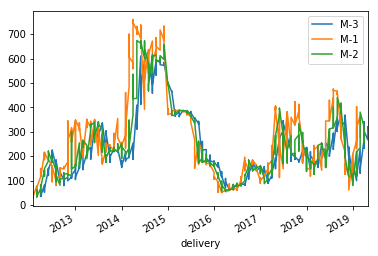

In [5]:
from dateutil.relativedelta import *
M1 = readData(data['M1'])
M1.price = M1.price.interpolate()
M1['delivery'] = M1.date.apply(lambda x: x + relativedelta(months=+1)) 
M1.set_index(M1.date, inplace=True, drop=True)
M1 = M1[['price', 'delivery']]

M2 = readData(data['M2'])
M2.price = M2.price.interpolate()
M2['delivery'] = M2.date.apply(lambda x: x + relativedelta(months=+2)) 
M2.set_index(M2.date, inplace=True, drop=True)
M2 = M2[['price', 'delivery']]

M3 = readData(data['M3'])
M3.price = M3.price.interpolate()
M3['delivery'] = M3.date.apply(lambda x: x + relativedelta(months=+3)) 
M3.set_index(M3.date, inplace=True, drop=True)
M3 = M3[['price', 'delivery']]

monthly_delivery_price = pd.merge(M3,pd.merge(M1, M2, left_on='delivery',right_on='delivery',how='outer',suffixes=('M1','M2'))
, left_on='delivery',right_on='delivery',how='outer')


monthly_delivery_price.set_index(monthly_delivery_price.delivery, inplace=True, drop=True)
monthly_delivery_price = monthly_delivery_price.drop(['delivery'], axis=1)
monthly_delivery_price = monthly_delivery_price.rename(columns={"price": "M-3", "priceM1": "M-1", 'priceM2': 'M-2'})
monthly_delivery_price.plot(label= 'a')


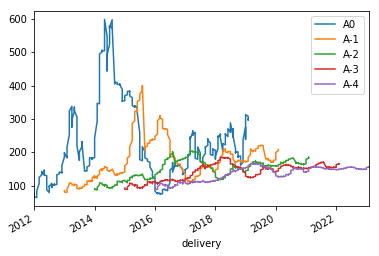

In [6]:
from dateutil.relativedelta import *
A0 = readData(data['A0'])
A0.price = A0.price.interpolate()
A0['delivery'] = A0.date 
A0.set_index(A0.date, inplace=True, drop=True)
A0 = A0[['price', 'delivery']]

A1 = readData(data['A1'])
A1.price = A1.price.interpolate()
A1['delivery'] = A1.date.apply(lambda x: x + relativedelta(years=+1)) 
A1.set_index(A1.date, inplace=True, drop=True)
A1 = A1[['price', 'delivery']]

A2 = readData(data['A2'])
A2.price = A2.price.interpolate()
A2['delivery'] = A2.date.apply(lambda x: x + relativedelta(years=+2)) 
A2.set_index(A2.date, inplace=True, drop=True)
A2 = A2[['price', 'delivery']]

A3 = readData(data['A3'])
A3.price = A3.price.interpolate()
A3['delivery'] = A3.date.apply(lambda x: x + relativedelta(years=+3)) 
A3.set_index(A3.date, inplace=True, drop=True)
A3 = A3[['price', 'delivery']]

A4 = readData(data['A4'])
A4.price = A4.price.interpolate()
A4['delivery'] = A4.date.apply(lambda x: x + relativedelta(years=+4)) 
A4.set_index(A4.date, inplace=True, drop=True)
A4 = A4[['price', 'delivery']]

yearly_delivery_price =  pd.merge(A0, pd.merge(pd.merge(A1, A2, left_on='delivery',right_on='delivery',how='outer',suffixes=('A1','A2')),pd.merge(A3, A4, left_on='delivery',right_on='delivery',how='outer',suffixes=('A3','A4'))
, left_on='delivery',right_on='delivery',how='outer'), left_on='delivery',right_on='delivery',how='outer',suffixes=('A0',''))


yearly_delivery_price.set_index(yearly_delivery_price.delivery, inplace=True, drop=True)
yearly_delivery_price = yearly_delivery_price.drop(['delivery'], axis=1)
yearly_delivery_price = yearly_delivery_price.rename(columns={"price": "A0", "priceA1": "A-1", 'priceA2': 'A-2', 'priceA3': 'A-3','priceA4': 'A-4'})
yearly_delivery_price.plot(label= 'a')


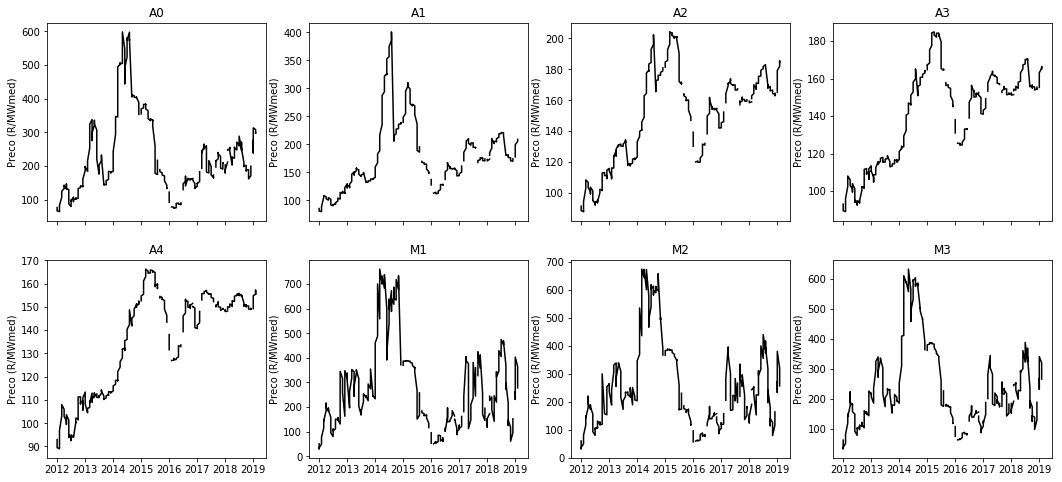

In [7]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.price, 'k')
        ax[i, j].set_title(products[k])
        ax[i,j].set(ylabel='Preco (R/MWmed)')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/priceSeries.png'))


# Sasonalidade

## M1

,price,delivery,season,season_correction,corrected_price
date,,,,,
2012-01-01,50.43,2012-02-01,15.199192,15.199192,35.230808
2012-01-01,40.25,2012-02-01,31.925561,31.925561,8.324439
2012-01-01,30.97,2012-02-01,47.155248,47.155248,-16.185248
2012-01-01,30.19,2012-02-01,57.242034,57.242034,-27.052034
2012-01-01,34.53,2012-02-01,35.312615,35.312615,-0.782615


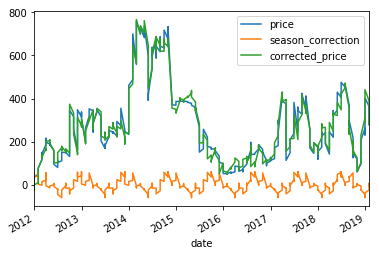

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = M1.price
result = seasonal_decompose(series, model='additive', freq=48)
M1['season_correction'] = result.seasonal
M1['corrected_price'] = M1.price - M1['season_correction']
M1[['price','season_correction', 'corrected_price']].plot()
M1.head()

In [23]:
import statsmodels.api as sm

In [40]:
mod_hamilton = sm.tsa.MarkovAutoregression(M1.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()


/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood               -1881.932
Date:                  Wed, 27 Nov 2019   AIC                           3791.863
Time:                          13:55:57   BIC                           3846.653
Sample:                               0   HQIC                          3813.626
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.2581     51.471      4.843      0.000     148.376     350.140
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.9101     52.256      5.605      0.000     190.490     395.331
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.8979     52.015      5.785      0.000     198.951     402.845
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1230.1035    105.915     11.614      0.000    1022.515    1437.692
ar.L1          1.2877      0.069     18.756      0.000       1.153       1.422
ar.L2         -0.4948      0.105     -4.702      0.000      -0.701      -0.289
ar.L3          0.3711      0.056      6.605      0.000       0.261       0.481
ar.L4         -0.1990      0.040     -4.994      0.000      -0.277      -0.121
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     1.333e-06        nan        nan        nan         nan         nan
p[1->0]     4.844e-09      0.046   1.04e-07      1.000      -0.091       0.091
p[2->0]        1.0000        nan        nan        nan         nan         nan
p[0->1]        0.5899      0.258      2.290      0.022       0.085       1.095
p[1->1]        0.9630        nan        nan        nan         nan         nan
p[2->1]     1.761e-16        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [41]:
print(res_hamilton.expected_durations)

[ 1.00000133 27.06102133  1.        ]


## M2

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,60.86,2012-03-01,7.294276,53.565724
2012-01-01,43.95,2012-03-01,14.734767,29.215233
2012-01-01,34.38,2012-03-01,29.271910,5.108090
2012-01-01,32.77,2012-03-01,28.466374,4.303626
2012-01-01,37.46,2012-03-01,-2.758239,40.218239


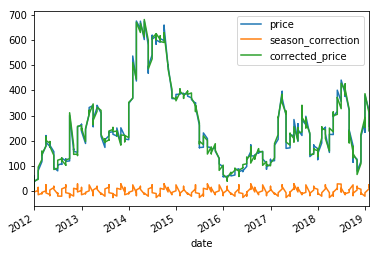

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = M2.price
result = seasonal_decompose(series, model='additive', freq=48)
M2['season_correction'] = result.seasonal
M2['corrected_price'] = M2.price - M2['season_correction']
M2[['price','season_correction', 'corrected_price']].plot()
M2.head()

In [43]:
mod_hamilton = sm.tsa.MarkovAutoregression(M2.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()


/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood               -1774.472
Date:                  Wed, 27 Nov 2019   AIC                           3576.945
Time:                          13:59:35   BIC                           3631.734
Sample:                               0   HQIC                          3598.707
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.5572     49.610      4.688      0.000     135.323     329.791
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.4680     49.948      5.115      0.000     157.572     353.364
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.8567     49.025      5.749      0.000     185.769     377.945
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       659.8658     29.731     22.194      0.000     601.593     718.138
ar.L1          1.3007      0.055     23.465      0.000       1.192       1.409
ar.L2         -0.4981      0.094     -5.273      0.000      -0.683      -0.313
ar.L3          0.3978      0.088      4.542      0.000       0.226       0.570
ar.L4         -0.2272      0.054     -4.232      0.000      -0.332      -0.122
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0004        nan        nan        nan         nan         nan
p[1->0]        0.0065        nan        nan        nan         nan         nan
p[2->0]        1.0000      0.539      1.855      0.064      -0.057       2.057
p[0->1]        0.8006        nan        nan        nan         nan         nan
p[1->1]        0.9543      0.005    175.187      0.000       0.944       0.965
p[2->1]      5.12e-09      0.577   8.87e-09      1.000      -1.131       1.131
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [44]:
print(res_hamilton.expected_durations)

[ 1.00035577 21.8999729   1.        ]


## M3

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,63.67,2012-04-01,-3.933074,67.603074
2012-01-01,45.95,2012-04-01,-0.745871,46.695871
2012-01-01,35.56,2012-04-01,3.018340,32.541660
2012-01-01,34.62,2012-04-01,-3.054115,37.674115
2012-01-01,39.65,2012-04-01,-4.749785,44.399785


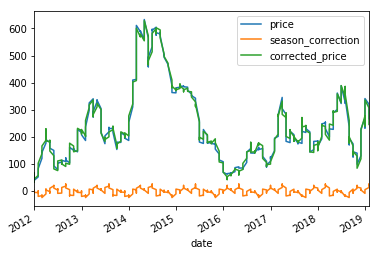

In [45]:
series = M3.price
result = seasonal_decompose(series, model='additive', freq=48)
M3['season_correction'] = result.seasonal
M3['corrected_price'] = M3.price - M3['season_correction']
M3[['price','season_correction', 'corrected_price']].plot()
M3.head()

In [46]:
mod_hamilton = sm.tsa.MarkovAutoregression(M3.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood               -1634.232
Date:                  Wed, 27 Nov 2019   AIC                           3296.464
Time:                          14:02:35   BIC                           3351.253
Sample:                               0   HQIC                          3318.227
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.0594     49.360      4.519      0.000     126.316     319.803
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9537     49.639      4.834      0.000     142.664     337.244
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.2830     49.493      5.400      0.000     170.278     364.288
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       197.0604     14.798     13.317      0.000     168.058     226.063
ar.L1          1.6009      0.126     12.679      0.000       1.353       1.848
ar.L2         -0.7761      0.344     -2.257      0.024      -1.450      -0.102
ar.L3          0.2996      0.361      0.831      0.406      -0.407       1.006
ar.L4         -0.1397      0.145     -0.962      0.336      -0.424       0.145
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8699      0.047     18.368      0.000       0.777       0.963
p[1->0]        0.6281      0.240      2.613      0.009       0.157       1.099
p[2->0]        0.2939      0.105      2.797      0.005       0.088       0.500
p[0->1]        0.0898      0.038      2.336      0.020       0.014       0.165
p[1->1]     5.156e-09      0.396    1.3e-08      1.000      -0.776       0.776
p[2->1]        0.0009        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [47]:
print(res_hamilton.expected_durations)

[7.68396384 1.00000001 3.39181002]


# A0

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,76.5,2012-01-01,-19.508585,96.008585
2012-01-01,71.5,2012-01-01,-19.305251,90.805251
2012-01-01,68.0,2012-01-01,-18.772558,86.772558
2012-01-01,67.5,2012-01-01,-22.005341,89.505341
2012-01-01,66.5,2012-01-01,-19.527558,86.027558


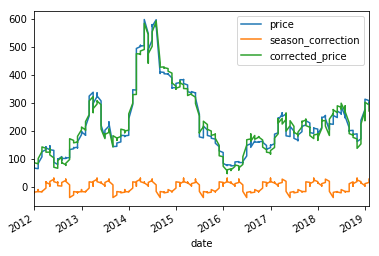

In [48]:
series = A0.price
result = seasonal_decompose(series, model='additive', freq=48)
A0['season_correction'] = result.seasonal
A0['corrected_price'] = A0.price - A0['season_correction']
A0[['price','season_correction', 'corrected_price']].plot()
A0.head()

In [49]:
mod_hamilton = sm.tsa.MarkovAutoregression(A0.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood                     nan
Date:                  Wed, 27 Nov 2019   AIC                                nan
Time:                          14:08:41   BIC                                nan
Sample:                               0   HQIC                               nan
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9576.9513        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9553.4691        nan        nan        nan         nan         nan
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.833e+04        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.052e+05        nan        nan        nan         nan         nan
ar.L1         -1.6375        nan        nan        nan         nan         nan
ar.L2         -1.2741        nan        nan        nan         nan         nan
ar.L3         -1.6355        nan        nan        nan         nan         nan
ar.L4         -0.9988        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     8.153e-81        nan        nan        nan         nan         nan
p[1->0]     3.535e-86        nan        nan        nan         nan         nan
p[2->0]             0        nan        nan        nan         nan         nan
p[0->1]        1.0000        nan        nan        nan         nan         nan
p[1->1]        1.0000        nan        nan        nan         nan         nan
p[2->1]             0        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [50]:
print(res_hamilton.expected_durations)

[ 1. inf inf]


## A1

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,85.5,2013-01-01,-7.513161,93.013161
2012-01-01,83.0,2013-01-01,-8.468578,91.468578
2012-01-01,81.5,2013-01-01,-7.143161,88.643161
2012-01-01,81.0,2013-01-01,-7.319486,88.319486
2012-01-01,81.0,2013-01-01,-7.738667,88.738667


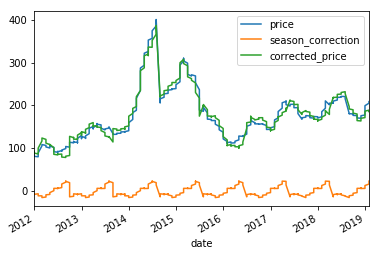

In [51]:
series = A1.price
result = seasonal_decompose(series, model='additive', freq=48)
A1['season_correction'] = result.seasonal
A1['corrected_price'] = A1.price - A1['season_correction']
A1[['price','season_correction', 'corrected_price']].plot()
A1.head()

In [52]:
mod_hamilton = sm.tsa.MarkovAutoregression(A1.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood                     nan
Date:                  Wed, 27 Nov 2019   AIC                                nan
Time:                          14:09:35   BIC                                nan
Sample:                               0   HQIC                               nan
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.1393        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.1469        nan        nan        nan         nan         nan
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.9061        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       109.6686        nan        nan        nan         nan         nan
ar.L1             nan        nan        nan        nan         nan         nan
ar.L2             nan        nan        nan        nan         nan         nan
ar.L3             nan        nan        nan        nan         nan         nan
ar.L4         -0.0694        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.3395        nan        nan        nan         nan         nan
p[1->0]        0.3350        nan        nan        nan         nan         nan
p[2->0]        0.3278        nan        nan        nan         nan         nan
p[0->1]        0.3401        nan        nan        nan         nan         nan
p[1->1]        0.3397        nan        nan        nan         nan         nan
p[2->1]        0.3316        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [53]:
print(res_hamilton.expected_durations)

[1.51411832 1.51440078 1.51654208]


## A2

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,91.5,2014-01-01,1.072518,90.427482
2012-01-01,89.5,2014-01-01,0.980197,88.519803
2012-01-01,89.0,2014-01-01,1.593902,87.406098
2012-01-01,89.0,2014-01-01,1.555718,87.444282
2012-01-01,88.5,2014-01-01,1.072935,87.427065


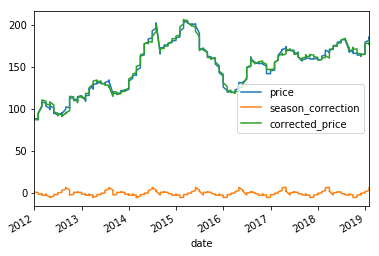

In [54]:
series = A2.price
result = seasonal_decompose(series, model='additive', freq=48)
A2['season_correction'] = result.seasonal
A2['corrected_price'] = A2.price - A2['season_correction']
A2[['price','season_correction', 'corrected_price']].plot()
A2.head()

In [55]:
mod_hamilton = sm.tsa.MarkovAutoregression(A2.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood                -909.407
Date:                  Wed, 27 Nov 2019   AIC                           1846.813
Time:                          14:10:07   BIC                           1901.602
Sample:                               0   HQIC                          1868.576
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.0602     15.246     10.761      0.000     134.178     193.943
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.0759     15.367     10.677      0.000     133.957     194.195
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.0693     15.275     10.741      0.000     134.132     194.007
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.9872      0.588     13.594      0.000       6.836       9.139
ar.L1          1.1950      0.052     23.018      0.000       1.093       1.297
ar.L2         -0.1134      0.081     -1.398      0.162      -0.272       0.046
ar.L3         -0.0200      0.081     -0.246      0.806      -0.179       0.139
ar.L4         -0.0724      0.052     -1.402      0.161      -0.174       0.029
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4026    126.935      0.003      0.997    -248.385     249.191
p[1->0]        0.3334    130.698      0.003      0.998    -255.829     256.496
p[2->0]        0.3154        nan        nan        nan         nan         nan
p[0->1]        0.3063        nan        nan        nan         nan         nan
p[1->1]        0.3615        nan        nan        nan         nan         nan
p[2->1]        0.3223    281.301      0.001      0.999    -551.018     551.663
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [56]:
print(res_hamilton.expected_durations)

[1.67398387 1.56622074 1.56816512]


## A3

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,93.0,2015-01-01,2.520833,90.479167
2012-01-01,92.5,2015-01-01,2.202723,90.297277
2012-01-01,91.5,2015-01-01,2.491920,89.008080
2012-01-01,90.5,2015-01-01,2.772277,87.727723
2012-01-01,89.5,2015-01-01,2.544717,86.955283


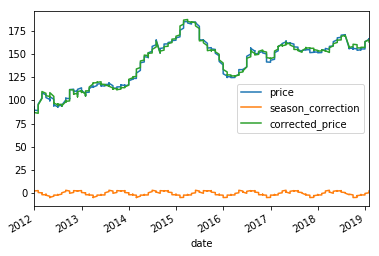

In [61]:
series = A3.price
result = seasonal_decompose(series, model='additive', freq=48)
A3['season_correction'] = result.seasonal
A3['corrected_price'] = A3.price - A3['season_correction']
A3[['price','season_correction', 'corrected_price']].plot()
A3.head()

In [62]:
mod_hamilton = sm.tsa.MarkovAutoregression(A3.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood                -677.188
Date:                  Wed, 27 Nov 2019   AIC                           1382.377
Time:                          14:15:24   BIC                           1437.166
Sample:                               0   HQIC                          1404.140
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.1282        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0683        nan        nan        nan         nan         nan
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.6182        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.7619      0.140     12.560      0.000       1.487       2.037
ar.L1          1.3367      0.060     22.464      0.000       1.220       1.453
ar.L2         -0.2138      0.101     -2.125      0.034      -0.411      -0.017
ar.L3         -0.0315      0.107     -0.296      0.767      -0.240       0.177
ar.L4         -0.0933      0.061     -1.523      0.128      -0.213       0.027
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9785      0.010    101.874      0.000       0.960       0.997
p[1->0]        0.0032        nan        nan        nan         nan         nan
p[2->0]        0.2850      0.162      1.754      0.079      -0.033       0.603
p[0->1]        0.0102      0.006      1.573      0.116      -0.003       0.023
p[1->1]        0.9876        nan        nan        nan         nan         nan
p[2->1]        0.1156      0.120      0.964      0.335      -0.119       0.351
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [63]:
print(res_hamilton.expected_durations)

[46.53865917 80.51914266  2.4965354 ]


## A4

,price,delivery,season_correction,corrected_price
date,,,,
2012-01-01,93.0,2016-01-01,2.979407,90.020593
2012-01-01,92.5,2016-01-01,2.362413,90.137587
2012-01-01,91.5,2016-01-01,2.790598,88.709402
2012-01-01,90.0,2016-01-01,3.136357,86.863643
2012-01-01,89.5,2016-01-01,3.280553,86.219447


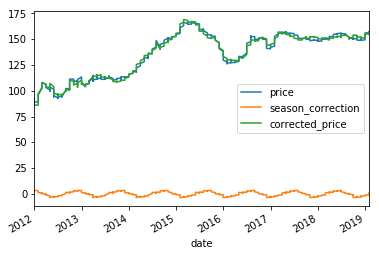

In [64]:
series = A4.price
result = seasonal_decompose(series, model='additive', freq=48)
A4['season_correction'] = result.seasonal
A4['corrected_price'] = A4.price - A4['season_correction']
A4[['price','season_correction', 'corrected_price']].plot()
A4.head()

In [65]:
mod_hamilton = sm.tsa.MarkovAutoregression(A4.corrected_price, k_regimes=3, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/pedroargento/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:          corrected_price   No. Observations:                  370
Model:             MarkovAutoregression   Log Likelihood                -602.649
Date:                  Wed, 27 Nov 2019   AIC                           1233.297
Time:                          14:16:40   BIC                           1288.086
Sample:                               0   HQIC                          1255.060
                                  - 370                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.9967      9.522     15.122      0.000     125.333     162.660
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.3167      9.507     15.496      0.000     128.684     165.950
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.8571      9.510     15.758      0.000     131.218     168.496
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9408      0.087     10.860      0.000       0.771       1.111
ar.L1          1.4692      0.076     19.455      0.000       1.321       1.617
ar.L2         -0.3671      0.137     -2.679      0.007      -0.636      -0.099
ar.L3         -0.0847      0.121     -0.698      0.485      -0.323       0.153
ar.L4         -0.0234      0.065     -0.363      0.717      -0.150       0.103
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.3828      0.600      0.638      0.523      -0.792       1.558
p[1->0]        0.0037      0.004      0.866      0.386      -0.005       0.012
p[2->0]        0.0211      0.021      0.984      0.325      -0.021       0.063
p[0->1]        0.6172      0.467      1.321      0.187      -0.299       1.533
p[1->1]        0.9485      0.015     62.518      0.000       0.919       0.978
p[2->1]        0.3532      0.103      3.445      0.001       0.152       0.554
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [66]:
print(res_hamilton.expected_durations)

[ 1.62024212 19.40227642  2.67179533]


# Análise Retornos

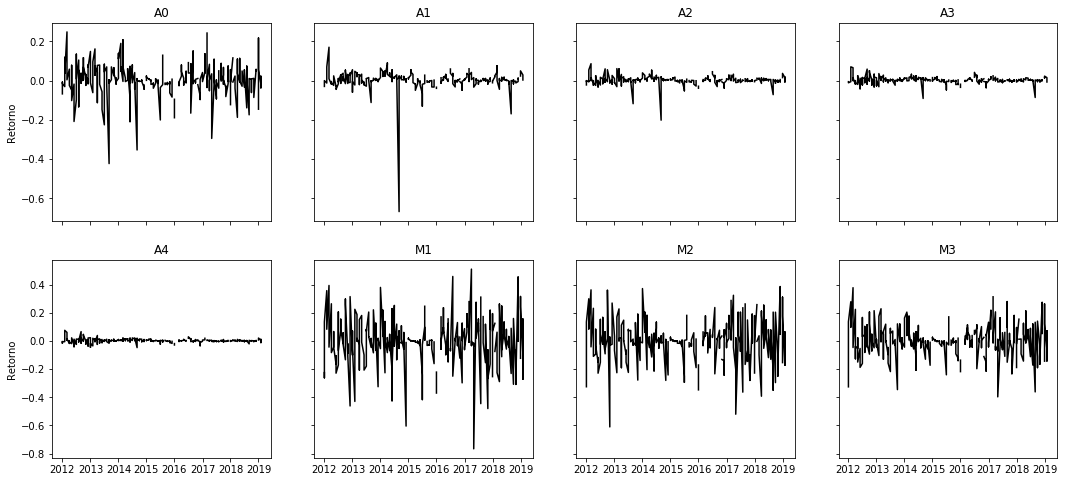

In [67]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.logReturn, 'k')
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Retorno')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/returnSeries.png'))

## Estatísticas Descritivas

In [68]:
ret = {'date': df.date}
for key in data.keys():
    df = readData(data[key])
    ret[key] = logReturn(df.price.interpolate())

Returns = pd.DataFrame(ret)
Returns.set_index(Returns.date, inplace=True, drop=True)
Returns = Returns.dropna()
Returns.head()

,date,M1,M2,M3,A0,A1,A2,A3,A4
date,,,,,,,,,
2012-01-01,2012-01-01,-0.225476,-0.325524,-0.326160,-0.067593,-0.029676,-0.022100,-0.005391,-0.005391
2012-01-01,2012-01-01,-0.262091,-0.245578,-0.256332,-0.050190,-0.018238,-0.005602,-0.010870,-0.010870
2012-01-01,2012-01-01,-0.025508,-0.047962,-0.026790,-0.007380,-0.006154,0.000000,-0.010989,-0.016529
2012-01-01,2012-01-01,0.134318,0.133760,0.135659,-0.014926,0.000000,-0.005634,-0.011111,-0.005571
2012-02-01,2012-02-01,0.356501,0.298700,0.277670,-0.030537,-0.012423,0.000000,-0.005602,-0.005602


In [ ]:
Returns.describe()

## Correlações

In [ ]:
import seaborn as sns
fig = sns.pairplot(Returns)
fig.savefig("correlationPlot.png")



In [ ]:
Returns.corr()


## Autocorrelações

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_acf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/acf.png'))

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_pacf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao Parcial')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/pacf.png'))

In [ ]:
k=0
products = sorted(data.keys())
fig, ax = plt.subplots(8, 2, sharex='col', sharey='row', figsize = (18,8))
for i in range(8):
        plot1 = plot_pacf(Returns[products[k]], lags = 15, ax = ax[i, 0])
        plot2 = plot_acf(Returns[products[k]], lags = 15, ax = ax[i, 1])
        ax[i,0].set(ylabel=products[k])
        ax[i,0].set(xlabel='Lag')
        ax[i,1].set(xlabel='Lag')
        k = k + 1

        
ax[0, 0].set_title('PACF ')
ax[0, 1].set_title('ACF')

fig.savefig(ospath(os.getcwd() + '/figs/pacf_acf.png'))

# Escolha dos modelos ARMA

In [69]:
import statsmodels.tsa.api as smt


In [70]:
for k in data.keys():
    best_aic = np.inf 
    best_order = None
    best_mdl = None


    a = np.empty([3,4])

    for i in range(1,3):
        for j in range(1,4):
            warnings.filterwarnings('ignore')
            try:
                tmp_mdl = smt.ARMA(Returns[k], order=(i, j)).fit(
                    method='mle', trend='nc'
                )
                tmp_aic = tmp_mdl.aic
                a[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, j)
                    best_mdl = tmp_mdl
            except: continue

    print(k)
    print('Best aic: {:6.5f} | order: {}'.format(best_aic, best_order))


M1
Best aic: -326.86021 | order: (2, 1)
M2
Best aic: -447.05565 | order: (1, 1)
M3
Best aic: -652.94374 | order: (1, 1)
A0
Best aic: -901.48288 | order: (1, 1)
A1
Best aic: -1267.21233 | order: (1, 1)
A2
Best aic: -1868.41243 | order: (1, 1)
A3
Best aic: -2107.56753 | order: (1, 1)
A4
Best aic: -2218.66541 | order: (1, 1)


# Testes de Heterocedasticidade Resíduos

In [71]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_white


In [72]:
A0 = smt.ARMA(Returns.A0, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A0.resid)[1]))
print(A0.pvalues)
A0.summary()

p-value Engle: 0.8590186336602714
ar.L1.A0    0.000124
ma.L1.A0    0.069183
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A0   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 453.741
Method:                           mle   S.D. of innovations              0.072
Date:                Wed, 27 Nov 2019   AIC                           -901.483
Time:                        14:20:02   BIC                           -889.718
Sample:                             0   HQIC                          -896.811
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A0       0.5386      0.139      3.879      0.000       0.266       0.811
ma.L1.A0      -0.2863      0.157     -1.823      0.069      -0.594       0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8568           +0.0000j            1.8568            0.0000
MA.1            3.4925           +0.0000j            3.4925            0.0000
-----------------------------------------------------------------------------
"""

In [73]:
A1 = smt.ARMA(Returns.A1, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A1.resid)[1]))
print(A1.pvalues)
A1.summary()

p-value Engle: 0.9999999999960347
ar.L1.A1    0.000031
ma.L1.A1    0.005369
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A1   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 636.606
Method:                           mle   S.D. of innovations              0.044
Date:                Wed, 27 Nov 2019   AIC                          -1267.212
Time:                        14:20:08   BIC                          -1255.448
Sample:                             0   HQIC                         -1262.541
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A1       0.6966      0.165      4.219      0.000       0.373       1.020
ma.L1.A1      -0.5441      0.194     -2.801      0.005      -0.925      -0.163
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4356           +0.0000j            1.4356            0.0000
MA.1            1.8380           +0.0000j            1.8380            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
A2 = smt.ARMA(Returns.A2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A2.resid)[1]))
print(A2.pvalues)
A2.summary()

p-value Engle: 0.9999962731994367
ar.L1.A2    2.088388e-07
ma.L1.A2    5.243661e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 937.206
Method:                           mle   S.D. of innovations              0.020
Date:                Wed, 27 Nov 2019   AIC                          -1868.412
Time:                        14:20:10   BIC                          -1856.648
Sample:                             0   HQIC                         -1863.741
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A2       0.6599      0.125      5.291      0.000       0.415       0.904
ma.L1.A2      -0.4248      0.151     -2.808      0.005      -0.721      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5155           +0.0000j            1.5155            0.0000
MA.1            2.3541           +0.0000j            2.3541            0.0000
-----------------------------------------------------------------------------
"""

In [75]:
A3 = smt.ARMA(Returns.A2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A3.resid)[1]))
print(A3.pvalues)
A3.summary()

p-value Engle: 0.9999962731994367
ar.L1.A2    2.088388e-07
ma.L1.A2    5.243661e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 937.206
Method:                           mle   S.D. of innovations              0.020
Date:                Wed, 27 Nov 2019   AIC                          -1868.412
Time:                        14:20:11   BIC                          -1856.648
Sample:                             0   HQIC                         -1863.741
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A2       0.6599      0.125      5.291      0.000       0.415       0.904
ma.L1.A2      -0.4248      0.151     -2.808      0.005      -0.721      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5155           +0.0000j            1.5155            0.0000
MA.1            2.3541           +0.0000j            2.3541            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
A4 = smt.ARMA(Returns.A4, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A4.resid)[1]))
print(A4.pvalues)
A4.summary()

p-value Engle: 3.130107836806424e-11
ar.L1.A4    1.703229e-08
ma.L1.A4    1.908967e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A4   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                1112.333
Method:                           mle   S.D. of innovations              0.012
Date:                Wed, 27 Nov 2019   AIC                          -2218.665
Time:                        14:20:14   BIC                          -2206.901
Sample:                             0   HQIC                         -2213.994
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A4       0.6594      0.114      5.767      0.000       0.435       0.884
ma.L1.A4      -0.4276      0.137     -3.126      0.002      -0.696      -0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5165           +0.0000j            1.5165            0.0000
MA.1            2.3389           +0.0000j            2.3389            0.0000
-----------------------------------------------------------------------------
"""

In [77]:
M1 = smt.ARMA(Returns.M1, order=(2, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M1.resid)[1]))
print(M1.pvalues)
M1.summary()

p-value Engle: 0.0898631709567866
ar.L1.M1     1.157609e-38
ar.L2.M1     1.196737e-03
ma.L1.M1    4.520741e-272
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M1   No. Observations:                  373
Model:                     ARMA(2, 1)   Log Likelihood                 167.430
Method:                           mle   S.D. of innovations              0.154
Date:                Wed, 27 Nov 2019   AIC                           -326.860
Time:                        14:20:18   BIC                           -311.174
Sample:                             0   HQIC                          -320.631
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M1      -0.7653      0.052    -14.654      0.000      -0.868      -0.663
ar.L2.M1       0.1693      0.052      3.265      0.001       0.068       0.271
ma.L1.M1       0.9879      0.010    101.408      0.000       0.969       1.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0587           +0.0000j            1.0587            0.5000
AR.2            5.5783           +0.0000j            5.5783            0.0000
MA.1           -1.0123           +0.0000j            1.0123            0.5000
-----------------------------------------------------------------------------
"""

In [78]:
M2 = smt.ARMA(Returns.M2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M2.resid)[1]))
print(M2.pvalues)
M2.summary()

p-value Engle: 0.1754485227249692
ar.L1.M2    0.001089
ma.L1.M2    0.022159
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 226.528
Method:                           mle   S.D. of innovations              0.132
Date:                Wed, 27 Nov 2019   AIC                           -447.056
Time:                        14:20:21   BIC                           -435.291
Sample:                             0   HQIC                          -442.384
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M2       0.5812      0.177      3.292      0.001       0.235       0.927
ma.L1.M2      -0.4418      0.192     -2.297      0.022      -0.819      -0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7207           +0.0000j            1.7207            0.0000
MA.1            2.2635           +0.0000j            2.2635            0.0000
-----------------------------------------------------------------------------
"""

In [79]:
M3 = smt.ARMA(Returns.M3, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M3.resid)[1]))
print(M3.pvalues)
M3.summary()

p-value Engle: 0.004645894127006504
ar.L1.M3    0.001549
ma.L1.M3    0.186123
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M3   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 329.472
Method:                           mle   S.D. of innovations              0.100
Date:                Wed, 27 Nov 2019   AIC                           -652.944
Time:                        14:20:23   BIC                           -641.179
Sample:                             0   HQIC                          -648.272
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M3       0.5096      0.160      3.189      0.002       0.196       0.823
ma.L1.M3      -0.2394      0.181     -1.325      0.186      -0.594       0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9624           +0.0000j            1.9624            0.0000
MA.1            4.1777           +0.0000j            4.1777            0.0000
-----------------------------------------------------------------------------
"""

# Testes de Heterocedasticidade Séries

In [80]:
products = sorted(data.keys())
for p in products:
    print(p + ':  p-value Engle: ' + str(het_arch(Returns[p])[1]))

A0:  p-value Engle: 0.9593314551382427
A1:  p-value Engle: 0.9999999999999949
A2:  p-value Engle: 0.9999994357407552
A3:  p-value Engle: 0.979626387207603
A4:  p-value Engle: 1.7680387841488738e-13
M1:  p-value Engle: 0.24090883566409246
M2:  p-value Engle: 0.09169639214147016
M3:  p-value Engle: 0.036673556375100724
